##AUTOR: JUAN PABLO JURADO MUÑOZ
UNIVERSIDAD: SERGIO ARBOLEDA
HPC-03

##TERCER PARCIAL

In [3]:
# Se importan las bibliotecas necesarias (libraries)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from IPython.core.pylabtools import figsize
from sklearn.metrics import r2_score

In [4]:
# Se importan los resultados obtenidos en el modelo implementado
# en C++ (modelo de regresión lineal)
costoCpp = pd.read_csv("/content/vectorCosto.txt", header=None)
thetaCpp = pd.read_csv("/content/vectorTheta.txt", header=None)
y_hatCpp = pd.read_csv("/content/Prediccion.txt", header=None)

costoCpp_test = pd.read_csv("/content/vectorCostoT.txt", header=None)
thetaCpp_test = pd.read_csv("/content/vectorThetaT.txt", header=None)
y_hatCpp_test = pd.read_csv("/content/PrediccionT.txt", header=None)

In [5]:
# Se importa a un DataFrame el dataset redwine
dfDiamonds = pd.read_csv("/content/diamondsHPC.csv")
dfDiamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# A continuación, se realiza el EDA (Análisis exploratorio de los datos)
# 1.- Información general del DataFrame
dfDiamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [7]:
# 2.- Se observa un resumen estadístico de los datos
dfDiamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
cut,53940.0,1.228940,1.265976,0.0,0.00,1.00,3.00,4.00
color,53940.0,3.174416,2.050156,0.0,1.00,4.00,5.00,6.00
clarity,53940.0,2.256136,1.766539,0.0,1.00,2.00,3.00,7.00
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


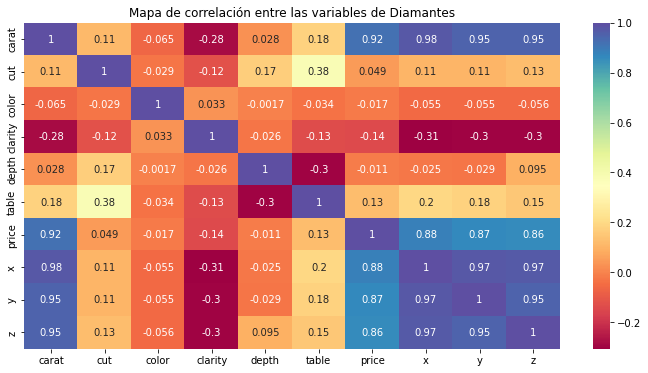

In [8]:
# 3.- A continuación, se presenta la matriz de correlación: Representa
# el grado de afinidad entre las variables. Si el Factor es cercano a
# 1 o -1, representa una alta afinidad o relación (directa o indirectamente
# proporcional)
mathCorr = dfDiamonds.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(mathCorr, annot=True, cmap='Spectral')
plt.title('Mapa de correlación entre las variables de Diamantes')
plt.show()

In [9]:
# Dada esa matriz de correlación, se presume que no hay una relación inversamente
# proporcional entre la variable dependiente e independientes, por lo tanto,
# se evidencia que presenta una relación significativamente baja.

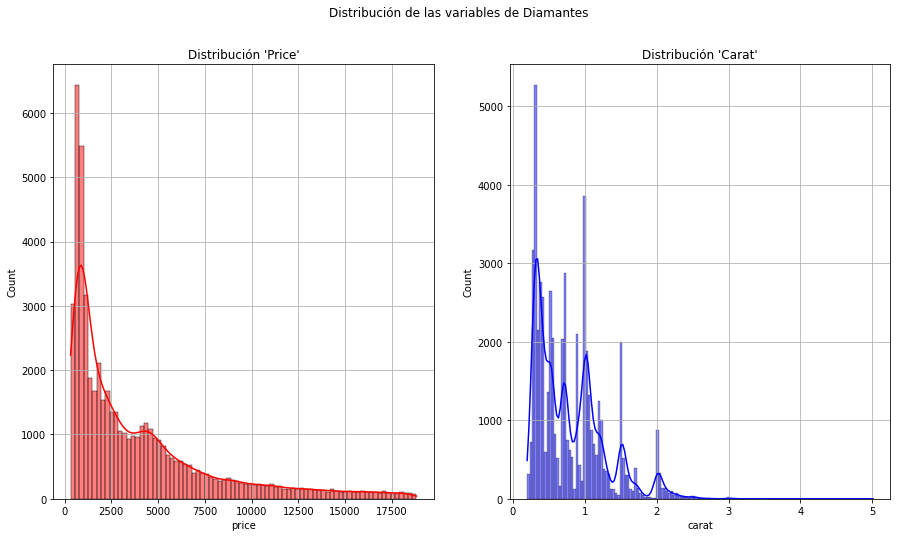

In [45]:
# 4.- A continuación, se presenta la distribución de las variables
# (se espera que la distribución de todas las varibales sea Normal-Gaussiana)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.suptitle('Distribución de las variables de Diamantes')
sns.histplot(dfDiamonds['price'], kde=True, color='r', ax=axes[0])
sns.histplot(dfDiamonds['carat'], kde=True, color='b', ax=axes[1])
axes[0].grid()
axes[0].set_title("Distribución 'Price'")
axes[1].grid()
axes[1].set_title("Distribución 'Carat'")
plt.show()

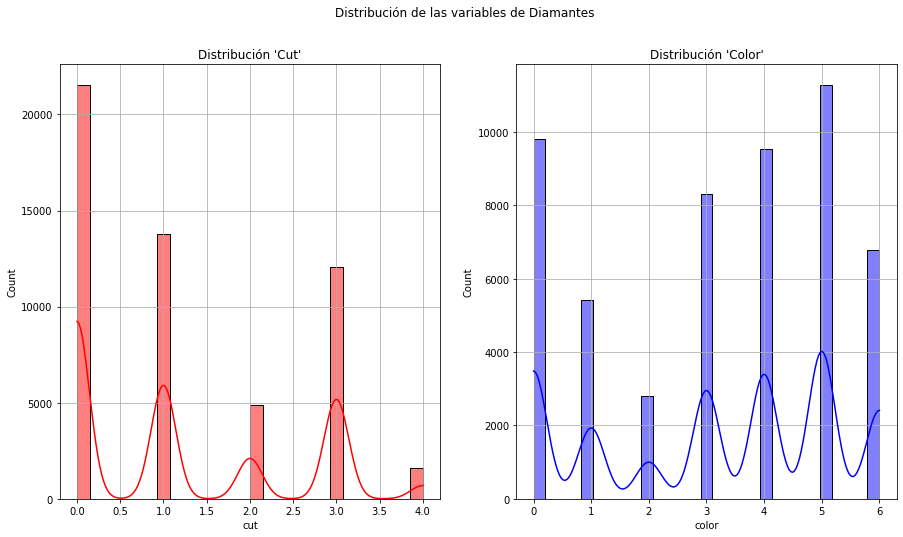

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.suptitle('Distribución de las variables de Diamantes')
sns.histplot(dfDiamonds['cut'], kde=True, color='r', ax=axes[0])
sns.histplot(dfDiamonds['color'], kde=True, color='b', ax=axes[1])
axes[0].grid()
axes[0].set_title("Distribución 'Cut'")
axes[1].grid()
axes[1].set_title("Distribución 'Color'")
plt.show()

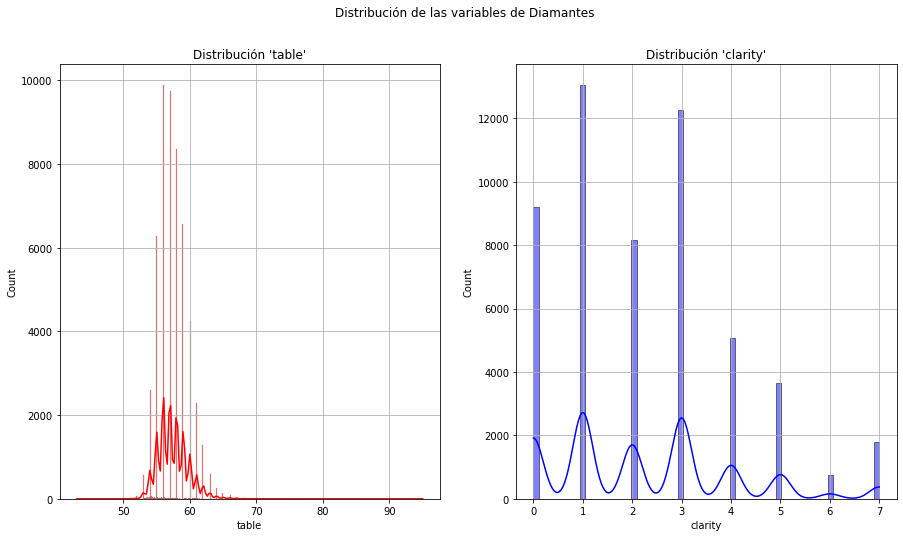

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.suptitle('Distribución de las variables de Diamantes')
sns.histplot(dfDiamonds['table'], kde=True, color='r', ax=axes[0])
sns.histplot(dfDiamonds['clarity'], kde=True, color='b', ax=axes[1])
axes[0].grid()
axes[0].set_title("Distribución 'table'")
axes[1].grid()
axes[1].set_title("Distribución 'clarity'")
plt.show()

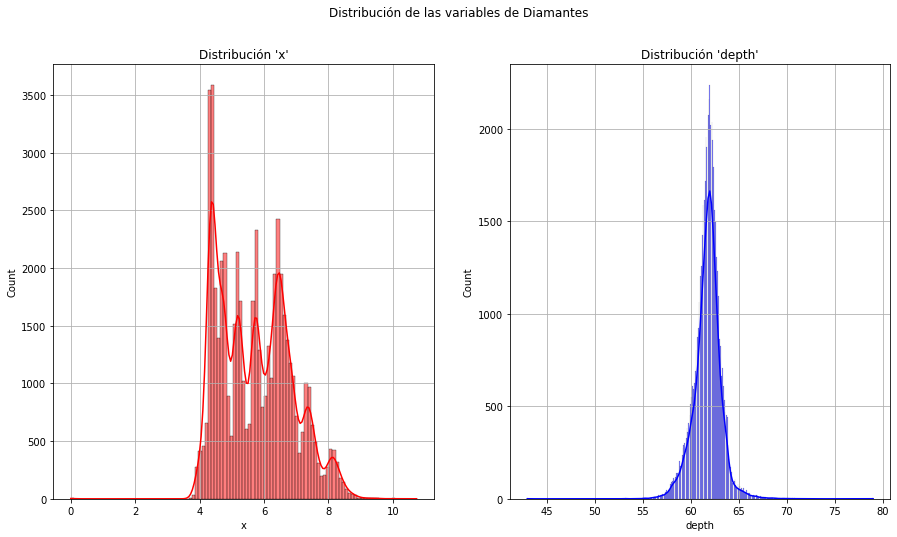

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.suptitle('Distribución de las variables de Diamantes')
sns.histplot(dfDiamonds['x'], kde=True, color='r', ax=axes[0])
sns.histplot(dfDiamonds['depth'], kde=True, color='b', ax=axes[1])
axes[0].grid()
axes[0].set_title("Distribución 'x'")
axes[1].grid()
axes[1].set_title("Distribución 'depth'")
plt.show()

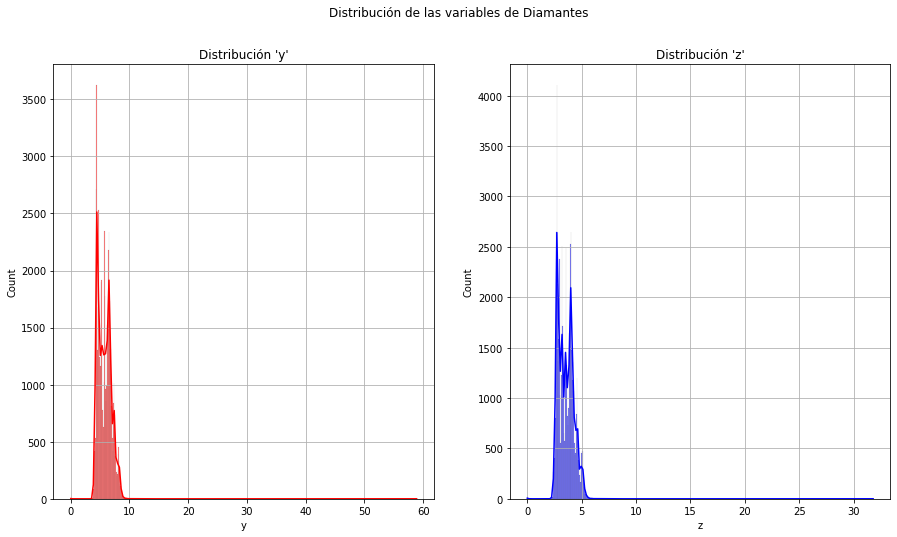

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.suptitle('Distribución de las variables de Diamantes')
sns.histplot(dfDiamonds['y'], kde=True, color='r', ax=axes[0])
sns.histplot(dfDiamonds['z'], kde=True, color='b', ax=axes[1])
axes[0].grid()
axes[0].set_title("Distribución 'y'")
axes[1].grid()
axes[1].set_title("Distribución 'z'")
plt.show()

In [11]:
# Se puede apreciar que las variables presentan una distribución Normal

In [12]:
# Se separa en 2 grupos: variables dependientes e independientes

In [13]:
X = dfDiamonds.drop(['price'], axis=1)
y = dfDiamonds['price']



---
A continuación, se dividen los datos en 2 grupos: prueba y entrenamiento (test, train)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:
# Se selecciona el modelo de Machine Learning: En un Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

In [16]:
# Se entrenan los datos
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

In [17]:
# Se toman los valores de predicción de entrenamiento
y_hatSk = pipe.predict(X_train)


In [18]:
pipe.fit(X_test, y_test)
# Se toman los valores de predicción de test
y_hatSk_test = pipe.predict(X_test)

##Regresion Lineal y Punto de corte

In [19]:
#Se realiza la regesion y el punto de corte del Modelo RL
regresion= LinearRegression().fit(X_train, y_train)

In [20]:
regresion.coef_

array([9699.45491912,  -83.45373659,   97.06742814,  289.03080571,
       -162.62742138,  -64.93458978, -842.44161005,   93.44313976,
        135.71680674])

In [21]:
regresion.intercept_

13000.299120595759

In [33]:
regresion.score(X_train,y_train)

0.871558110664378

##VALORES PROMEDIO EN PYTHON

In [22]:
dfDiamonds.mean()

carat         0.797940
cut           1.228940
color         3.174416
clarity       2.256136
depth        61.749405
table        57.457184
price      3932.799722
x             5.731157
y             5.734526
z             3.538734
dtype: float64

##VALORES PROMEDIO EN QT

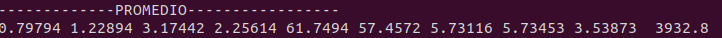

##ULTIMOS 4 VALORES DEL NORMALIZADOR EN PYTHON

In [23]:
from sklearn import  preprocessing

In [24]:
normalizador= preprocessing.scale(dfDiamonds)

In [25]:
print(normalizador[53936])
print(normalizador[53937])
print(normalizador[53938])
print(normalizador[53939])

[-0.16442747  0.6090695   1.37824171 -0.71107874  0.94275271 -1.09967199
 -0.29473076 -0.03669017  0.01354848  0.10098767]
[-0.20662095  1.398981    1.37824171 -0.71107874  0.73334442  1.13799526
 -0.29473076 -0.06343409 -0.04774083  0.03013526]
[ 0.13092691 -0.18084199 -0.08507531 -1.27716274 -0.52310533  0.24292836
 -0.29473076  0.37338325  0.33750627  0.28520393]
[-0.10113725 -0.97075349  1.37824171 -1.27716274  0.31452784 -1.09967199
 -0.29473076  0.08811478  0.11861587  0.14349912]


##ULTIMOS 4 VALORES DEL NOMALIZADOR EN QT

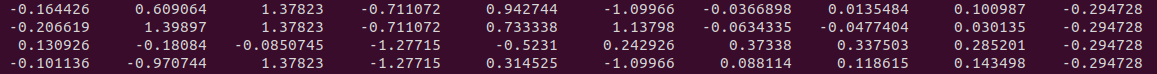

##Train

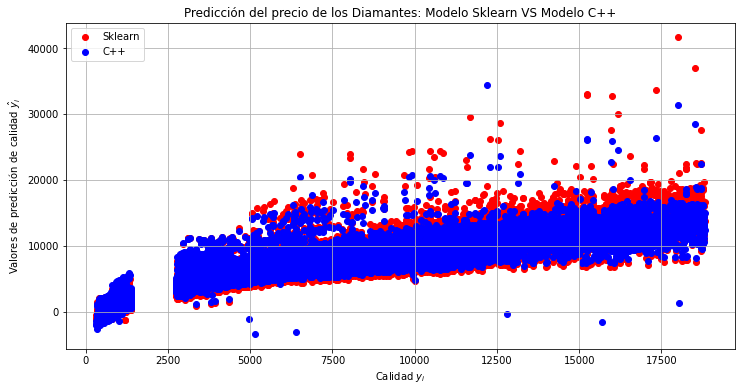

In [26]:
# Se presentan las gráficas de predicciones entre el modelo C++ y
# el modelo Sklearn
fig, axes = plt.subplots(figsize=(12, 6))
plt.scatter(y_train, y_hatSk, c='r', label='Sklearn')
plt.scatter(y_train, y_hatCpp, c='b', label='C++')
plt.legend(loc=2)
plt.grid()
plt.title('Predicción del precio de los Diamantes: Modelo Sklearn VS Modelo C++')
plt.xlabel('Calidad $y_i$')
plt.ylabel('Valores de predicción de calidad $\hat{y_i}$')
plt.show()

In [27]:
# Se extrae las métricas de rendimiento
r2Sk = r2_score(y_train, y_hatSk)
r2Cpp = r2_score(y_train, y_hatCpp)
print(f"Métrica de rendimiento SK (r2_score) {r2Sk}")
print(f"Métrica de rendimiento CPP (r2_score) {r2Cpp}")

Métrica de rendimiento SK (r2_score) 0.871558110664378
Métrica de rendimiento CPP (r2_score) 0.8553795627280307


VALOR METRICA DE RENDIMIENTO TRAIN EN QT


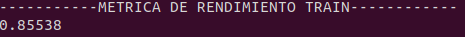

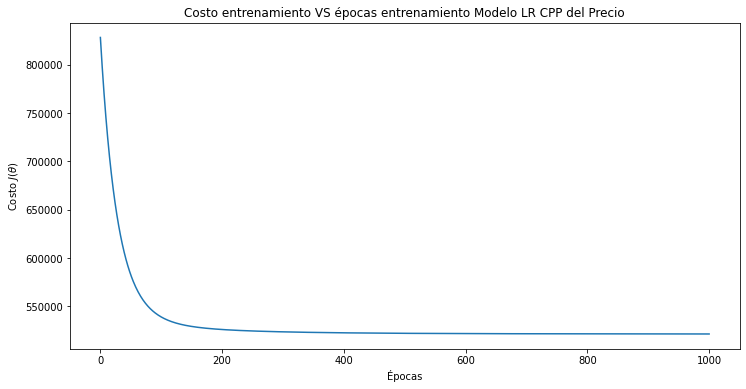

In [28]:
# Se presenta la función de costo
plt.figure(figsize=(12, 6))
plt.plot(costoCpp)
plt.title('Costo entrenamiento VS épocas entrenamiento Modelo LR CPP del Precio')
plt.ylabel(r'Costo $J(\theta)$')
plt.xlabel('Épocas')
plt.show()

In [29]:
# El gradiente descendiente representa las derivadas parciales
# m y b representa los coeficientes
# en la función de costo 

# Se observa que a medida que se itera, se va encontrando el mínimo valor para
# que la función de costo sea mínima.

##Prediccion de los valores de price con X_train

In [37]:
prediccion_X_train=regresion.predict(X_train)
prediccion_X_train

array([ -967.76392408, -1048.13843547,  -549.98984057, ...,
         216.08743784,  1768.301961  ,  1821.1597179 ])

##TEST


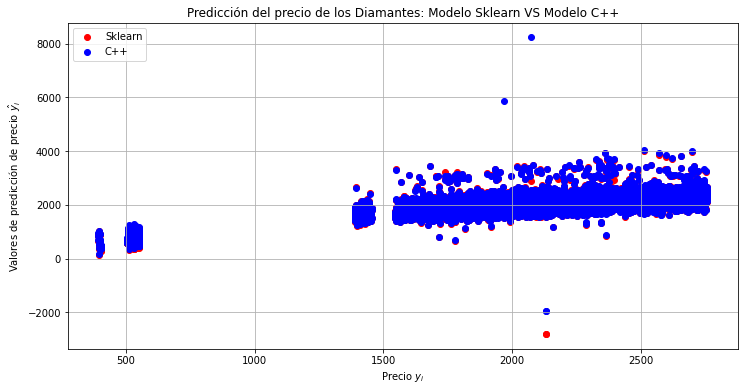

In [30]:
# Se presentan las gráficas de predicciones entre el modelo C++ y
# el modelo Sklearn
fig, axes = plt.subplots(figsize=(12, 6))
plt.scatter(y_test, y_hatSk_test, c='r', label='Sklearn')
plt.scatter(y_test, y_hatCpp_test, c='b', label='C++')
plt.legend(loc=2)
plt.grid()
plt.title('Predicción del precio de los Diamantes: Modelo Sklearn VS Modelo C++')
plt.xlabel('Precio $y_i$')
plt.ylabel('Valores de predicción de precio $\hat{y_i}$')
plt.show()

In [31]:
# Se extrae las métricas de rendimiento
r2Sk_Test = r2_score(y_test, y_hatSk_test)
r2Cpp_Test = r2_score(y_test, y_hatCpp_test)
print(f"Métrica de rendimiento SK (r2_score) {r2Sk_Test}")
print(f"Métrica de rendimiento CPP (r2_score) {r2Cpp_Test}")

Métrica de rendimiento SK (r2_score) 0.752992718142954
Métrica de rendimiento CPP (r2_score) 0.7400581449424875


VALOR METRICA DE RENDIMIENTO TEST EN QT



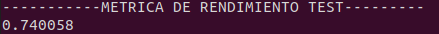

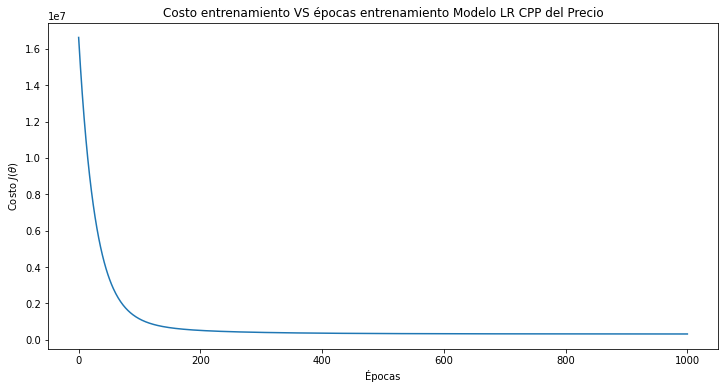

In [32]:
# Se presenta la función de costo
plt.figure(figsize=(12, 6))
plt.plot(costoCpp_test)
plt.title('Costo entrenamiento VS épocas entrenamiento Modelo LR CPP del Precio')
plt.ylabel(r'Costo $J(\theta)$')
plt.xlabel('Épocas')
plt.show()

##Prediccion de los valores de price con X_test

In [36]:
prediccion_X=regresion.predict(X_test)
prediccion_X

array([1168.18044364, 1148.0369714 , 1277.65134804, ..., 2547.60363201,
       3761.53695796, 3301.55265118])